# G1 Mid-Term project : World Connectivity through twitter trends

1. Vijay Hareesh Yadav Avula;
1. Anusha Ramamurthy;

[Twitter](http://twitter.com/) is a social platform for people to exchange thoughts and is majorly known for its trends started by '#' hashtags. We are trying to derive some intuitions with the data retrieved from the website which depicts various top trends(repeatedly known for hashtags) on the basis of location and we would like to find out the correlation between the trends and location.
Dataset download link [here](https://dl.dropboxusercontent.com/u/58075/trends.tar).


# Existing work:

 Traveling Trends: Social Butterflies or Frequent Fliers? by Emilio Ferrara, Onur Varol, Filippo Menczer, Alessandro Flammini;

They have crawled the twitter stream for years together to form a dataset from which they wanted to find out similar insights about the data. The publication aimed at the disecting twitter trends over 63 locations in United States which are some major cities and tried to explore the way trends travel from one place to another. They have run clustering algorithms to cluster the locations which had similar top trends and could find 4 clear clusters of locations. They have calculated Jaccards similarity of the trends among the clusters and could plot them using a heat map which could define a clear difference among the clusters that they have calculated. They were able to get the trend lifetime using the data and have plotted them through a XY plot. Using the time of the trends that are similar in places from the data, they were able to calculate where the trend has originated from and where it has ended i.e., how the trends have travelled from one place to another. Using this, they have come up with a set of locations which are labelled as trend setters i.e., where the trends usually start and trend followers that are ususally places where the trends end up if they are similar in time. Surprisingly the trend setters do not depend on the timezones that they fall in.

# Hypothesis:

 The idea was to find a similarity between the trends and to visualise the connections between two places on a world map how they are connected. However, the time constraint and the data constraint has limited it to only united states.

# Results:


Importing all the required libraries:

In [1]:
import gzip
import json
import pickle
import codecs
import matplotlib.pyplot as plt
import os
import pandas as pd
from collections import defaultdict
from pprint import pprint
import numpy as np
import seaborn as sns

The filenames are in the format locationid_date.json.gz. Thus, getting all the different dates in the folder:

In [2]:
path = "/Users/vijayhareesh/Desktop/Data_Visualisation/trends-1/"
dates = set()
for files in os.listdir(path):
    dates.add(str((str(files).split('_')[-1]).split('.')[0]))
#print dates
dates.discard('')
adates_df = pd.DataFrame(list(dates))
adates_df.columns = ['date']
adates_df.head()

,date
0,2014-06-30
1,2013-04-19
2,2013-04-18
3,2013-04-11
4,2013-04-10


Now we would like to divide the dates into each year:

In [3]:
distinct_years = set()
for alldates in dates:
    distinct_years.add(alldates.split('-')[0])
distinct_years.discard('list')
distinct_years.discard('Store')
print distinct_years

set(['2015', '2014', '2013'])


Lets segregate dates year wise and know for which days in 2015, the trends have been crawled

In [6]:
dates_by_year = defaultdict(list)
dates_df =[]
for alldates in dates:
    for i in distinct_years:
        if alldates.split('-')[0] == i:
            dates_by_year[i].append(alldates)
dates2015_df = pd.DataFrame(dates_by_year['2015'])
print dates2015_df

              0
0    2015-07-01
1    2015-07-03
2    2015-07-02
3    2015-06-14
4    2015-06-11
5    2015-06-10
6    2015-06-13
7    2015-06-12
8    2015-06-15
9    2015-06-17
10   2015-06-16
11   2015-06-19
12   2015-06-18
13   2015-02-01
14   2015-02-19
15   2015-02-18
16   2015-02-15
17   2015-02-14
18   2015-02-17
19   2015-02-16
20   2015-02-11
21   2015-02-10
22   2015-02-13
23   2015-02-12
24   2015-05-29
25   2015-05-28
26   2015-05-26
27   2015-04-30
28   2015-05-27
29   2015-03-09
..          ...
154  2015-04-20
155  2015-04-21
156  2015-04-28
157  2015-04-29
158  2015-01-23
159  2015-01-22
160  2015-01-29
161  2015-01-28
162  2015-03-18
163  2015-03-19
164  2015-03-12
165  2015-03-13
166  2015-03-10
167  2015-03-11
168  2015-03-16
169  2015-03-14
170  2015-02-08
171  2015-05-19
172  2015-05-14
173  2015-05-15
174  2015-05-16
175  2015-05-17
176  2015-05-12
177  2015-05-13
178  2015-01-25
179  2015-01-24
180  2015-01-27
181  2015-01-26
182  2015-01-21
183  2015-01-20

[184 ro

Likewise for 2013 and 2014 too:

In [7]:
dates2013_df = pd.DataFrame(dates_by_year['2013'])
print dates2013_df
dates2014_df = pd.DataFrame(dates_by_year['2014'])
print dates2014_df

              0
0    2013-04-19
1    2013-04-18
2    2013-04-11
3    2013-04-10
4    2013-04-13
5    2013-04-12
6    2013-09-05
7    2013-04-14
8    2013-04-17
9    2013-04-16
10   2013-09-09
11   2013-09-08
12   2013-07-14
13   2013-07-15
14   2013-07-16
15   2013-07-17
16   2013-07-10
17   2013-07-11
18   2013-07-12
19   2013-07-13
20   2013-07-18
21   2013-07-19
22   2013-09-01
23   2013-09-03
24   2013-09-02
25   2013-04-15
26   2013-09-04
27   2013-09-07
28   2013-09-06
29   2013-04-04
..          ...
208  2013-06-13
209  2013-06-12
210  2013-06-11
211  2013-06-10
212  2013-06-19
213  2013-06-18
214  2013-10-30
215  2013-10-31
216  2013-11-08
217  2013-11-09
218  2013-11-02
219  2013-05-05
220  2013-05-04
221  2013-05-07
222  2013-05-06
223  2013-05-01
224  2013-05-03
225  2013-05-02
226  2013-05-09
227  2013-05-08
228  2013-06-28
229  2013-06-29
230  2013-06-26
231  2013-06-27
232  2013-06-24
233  2013-06-25
234  2013-06-22
235  2013-06-23
236  2013-06-20
237  2013-06-21

[238 ro

In [8]:
dates_df ={'2013':len(dates_by_year['2013']),'2014':len(dates_by_year['2014']),'2015':len(dates_by_year['2015'])}

So, We have trends data for 316 days out of 365 days in 2014. 

Now,let us parse the json files and get the trends for a particular year. say 2013

In [4]:
allfilenames = []
for files in os.listdir(path):
    if str(files)[-4:]=="n.gz":
        print str(files)     #prints filename
        allfilenames.append(str(files))
            #print "*********************"
    #trend_stats=[]
    #locdict=defaultdict(set)

1_2013-04-07.json.gz
1_2013-04-08.json.gz
1_2013-04-09.json.gz
1_2013-04-10.json.gz
1_2013-04-11.json.gz
1_2013-04-12.json.gz
1_2013-04-13.json.gz
1_2013-04-14.json.gz
1_2013-04-15.json.gz
1_2013-04-16.json.gz
1_2013-04-17.json.gz
1_2013-04-18.json.gz
1_2013-04-19.json.gz
1_2013-04-20.json.gz
1_2013-04-21.json.gz
1_2013-04-22.json.gz
1_2013-04-23.json.gz
1_2013-04-24.json.gz
1_2013-04-25.json.gz
1_2013-04-26.json.gz
1_2013-04-27.json.gz
1_2013-04-28.json.gz
1_2013-04-29.json.gz
1_2013-04-30.json.gz
1_2013-05-01.json.gz
1_2013-05-02.json.gz
1_2013-05-03.json.gz
1_2013-05-04.json.gz
1_2013-05-05.json.gz
1_2013-05-06.json.gz
1_2013-05-07.json.gz
1_2013-05-08.json.gz
1_2013-05-09.json.gz
1_2013-05-10.json.gz
1_2013-05-11.json.gz
1_2013-05-12.json.gz
1_2013-05-13.json.gz
1_2013-05-14.json.gz
1_2013-05-15.json.gz
1_2013-05-16.json.gz
1_2013-05-17.json.gz
1_2013-05-18.json.gz
1_2013-05-19.json.gz
1_2013-05-20.json.gz
1_2013-05-21.json.gz
1_2013-05-22.json.gz
1_2013-05-23.json.gz
1_2013-05-24.

In [ ]:
for files in allfilenames:
    trend_stats=[]
    locdict=defaultdict(set)
    if str(files)[-3:]==".gz":
        with gzip.open(path+files, "rb") as f:
            for line in f:
                while True:
                    try:
                        jfile = json.loads(line)
                        loc = jfile[0]['locations'][0]['name']
                        woeid = jfile[0]['locations'][0]['woeid']
                        for d in jfile[0]['trends']:
                            locdict[loc].add(d['name'])
                        break
                    except ValueError:
                        #print "hi"
                        #if next(f) != '':
                        try:
                            line += next(f)
                        except StopIteration:
                            break
            f.close()
            trend_stats.append(str((str(files).split('_')[-1]).split('.')[0]))
            trend_stats.append(woeid)
            trend_stats.append(loc)
            trend_stats.append(len(locdict[loc]))
    with open("trend_stats2013.txt", "a") as text_file:
        item = u''.join((trend_stats[2])).encode('utf-8').strip()
        print>>text_file, str(trend_stats[0])+', '+str(trend_stats[1])+', '+item+', '+str(trend_stats[3])
        text_file.close()

In [5]:
trendstat_df = pd.read_csv('trend_stats.csv', delimiter=', ', header=None)
trendstat_df.columns =['date', 'woeid', 'location', 'trend_count']
trendstat_df.head()

/Users/vijayhareesh/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


,date,woeid,location,trend_count
0,2013-04-07,1,Worldwide,289
1,2013-04-08,1,Worldwide,391
2,2013-04-09,1,Worldwide,408
3,2013-04-10,1,Worldwide,408
4,2013-04-11,1,Worldwide,423


In [6]:
distinct_locations = list(trendstat_df['location'].unique())
distinct_locations.remove('Worldwide')
distinct_locations.remove('Mersin')
distinct_locations.remove('Turkey')
distinct_locations.remove('United States')
distinct_locations.remove('Adana')
distinct_locations.remove('Ankara')
distinct_locations.remove('Antalya')
distinct_locations.remove('Bursa')
distinct_locations.remove('Diyarbak\xc4\xb1r')
distinct_locations.remove('Eski\xc5\x9fehir')
distinct_locations.remove('Gaziantep')
distinct_locations.remove('Istanbul')
distinct_locations.remove('Izmir')
distinct_locations.remove('Kayseri')
distinct_locations.remove('Konya')
print len(distinct_locations)

63


In [ ]:
#filterDate = "2013-11-28"
for files in allfilenames:
    trend_stats=[]
    locdict=defaultdict(set)
    if str(files)[-3:]==".gz":
        with gzip.open(path+files, "rb") as f:
            for line in f:
                while True:
                    try:
                        jfile = json.loads(line)
                        loc = jfile[0]['locations'][0]['name']
                        woeid = jfile[0]['locations'][0]['woeid']
                        for d in jfile[0]['trends']:
                            locdict[loc].add(u''.join(d['name']).encode('utf-8').strip())
                        break
                    except ValueError:
                        #print "hi"
                        #if next(f) != '':
                        try:
                            line += next(f)
                        except StopIteration:
                            break
            f.close()
            trend_stats.append(str((str(files).split('_')[-1]).split('.')[0]))
            #trend_stats.append(filterDate)
            trend_stats.append(woeid)
            trend_stats.append(loc)
            trend_stats.append(len(locdict[loc]))
            #print len(trend_stats)
        with open("alltrends1.csv", "a") as text_file:
            #print len(trend_stats)
            item1 = u''.join((trend_stats[2])).encode('utf-8').strip()
            #item = u''.join((locdict[loc])).encode('utf-8').strip()
            for items in list(locdict[loc]):
                print>>text_file, str(trend_stats[0])+', '+str(trend_stats[1])+', '+item1+', '+items
            #print>>text_file, str(trend_stats[0])+', '+str(trend_stats[1])+', '+item1+', '+list(locdict[loc])
            text_file.close()

In [7]:
trendsall_df = pd.read_csv('alltrends.csv', delimiter=', ', header=None)
trendsall_df.columns =['date', 'woeid', 'location', 'trends']
trendsall_df.head()

,date,woeid,location,trends
0,2013-04-07,1,Worldwide,#YoSoyMovilizador
1,2013-04-07,1,Worldwide,Jericho
2,2013-04-07,1,Worldwide,Matt Barnes
3,2013-04-07,1,Worldwide,F-5
4,2013-04-07,1,Worldwide,Joakim Noah


In [13]:
sorted_by_date = trendsall_df[trendsall_df['trends'].str.contains('iphone|iPhone')].sort('date')


In [14]:
sorted_by_date

,date,woeid,location,trends
2441987,2013-04-09,2418046,Harrisburg,iPhones
5155442,2013-04-09,2487956,San Francisco,iPhones
1604392,2013-04-09,2380358,Cincinnati,iPhones
3529146,2013-04-09,2450022,Miami,iPhones
1535000,2013-04-09,2379574,Chicago,iPhones
4510593,2013-04-09,2475687,Portland,iPhones
2742411,2013-04-09,2428184,Jackson,iPhones
1947609,2013-04-09,2388929,Dallas-Ft. Worth,iPhones
1328348,2013-04-09,2364559,Birmingham,iPhones
4234593,2013-04-09,2466256,Orlando,iPhones


trend_stats_per_day = defaultdict(list)
#for files in os.scandir(path):
#dates.add(str((str(files).split('_')[-1]).split('.')[0]))
#dates.discard('')
#print dates
#filterDate = "2013-11-28"
for filterDate in dates_by_year['2013']:
    print filterDate
    trend_stats = []
    print "***************************"
    locdict = defaultdict(set)
    for files in os.listdir(path):
        if str(files).find(filterDate) != -1:
            #print str(files)     #prints filename
            #print "*********************"
            with gzip.open(path+files, "rt") as f:
                for line in f:
                    while True:
                        try:
                            jfile = json.loads(line)
                            loc = jfile[0]['locations'][0]['name']
                            for d in jfile[0]['trends']:
                                locdict[loc].add(d['name'])
                            break
                        except ValueError or StopIteration:
                            line += next(f)
            #print loc    #prints location
            f.close
            woeid = jfile[0]['locations'][0]['woeid']
            trend_stats.append(woeid)
            trend_stats.append(loc)
            trend_stats.append(len(locdict[loc]))
            #print len(locdict[loc])    #print trend count
    trend_stats_per_day[filterDate].append(trend_stats)
    #print locdict
print trend_stats_per_day

In [29]:
df = pd.read_csv('trend_stats.csv', delimiter=', ')
df.head()

,2013-04-07,1,Worldwide,289
0,2013-04-08,1,Worldwide,391
1,2013-04-09,1,Worldwide,408
2,2013-04-10,1,Worldwide,408
3,2013-04-11,1,Worldwide,423
4,2013-04-12,1,Worldwide,386


In [37]:
def strip(text):
    try:
        return text.strip()
    except AttributeError:
        return text

def make_int(text):
    return int(text.strip('" '))

table = pd.read_table("trend_stats.csv", sep=r',',
                      names=["Date", "woeid", "location", "trend_count"],
                      converters = {'Date' : strip,
                                    'woeid' : strip,
                                    'location' : strip,
                                    'trend_count' : make_int})
df = table

In [38]:
loclist = []
locDict = {}
for i in df['location']:
    if(i not in locDict):
        locDict[i] = 1
    else:
        locDict[i]+=1
for i in locDict.keys():
    loclist.append(i)


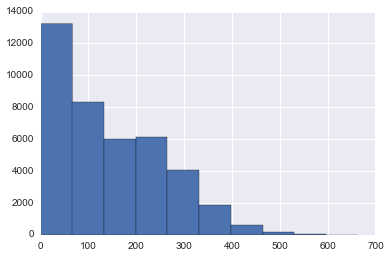

In [40]:
df['trend_count'].hist()

Let's find out how the top trend count worldwide over the years gathered

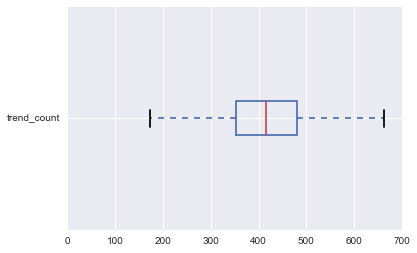

In [41]:
#boxplot for trends around the world
df[df['location'] == 'Worldwide']['trend_count'].plot(kind='box', vert=False)

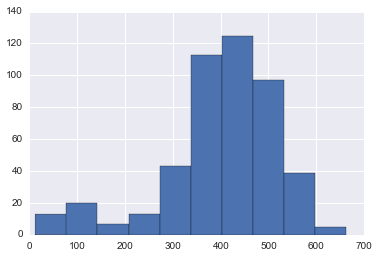

In [43]:
df[df['location'] == 'Worldwide']['trend_count'].hist()

Getting the list of all the locations that we are filtering the top trends for:

In [42]:

print distinct_locations  #all distinct locations

['Albuquerque', 'Atlanta', 'Austin', 'Baltimore', 'Baton Rouge', 'Birmingham', 'Boston', 'Charlotte', 'Chicago', 'Cincinnati', 'Cleveland', 'Colorado Springs', 'Columbus', 'Dallas-Ft. Worth', 'Denver', 'Detroit', 'El Paso', 'Fresno', 'Greensboro', 'Harrisburg', 'Honolulu', 'Houston', 'Indianapolis', 'Jackson', 'Jacksonville', 'Kansas City', 'Las Vegas', 'Long Beach', 'Los Angeles', 'Louisville', 'Memphis', 'Mesa', 'Miami', 'Milwaukee', 'Minneapolis', 'Nashville', 'New Haven', 'New Orleans', 'New York', 'Norfolk', 'Oklahoma City', 'Omaha', 'Orlando', 'Philadelphia', 'Phoenix', 'Pittsburgh', 'Portland', 'Providence', 'Raleigh', 'Richmond', 'Sacramento', 'St. Louis', 'Salt Lake City', 'San Antonio', 'San Diego', 'San Francisco', 'San Jose', 'Seattle', 'Tallahassee', 'Tampa', 'Tucson', 'Virginia Beach', 'Washington']


In [8]:
print len(distinct_locations)

63


Finding Jaccard Similarity for the locations:

jaccard_df = pd.DataFrame()
for idx1, val1 in enumerate(distinct_locations):
    jsim1=[]
    for idx2, val2 in enumerate(distinct_locations):
        df1 = trendsall_df[trendsall_df['location']== val1 ][['date', 'trends']]
        df2 = trendsall_df[trendsall_df['location']== val2 ][['date', 'trends']]
        
        intersection_cnt = (df1.merge(df2)).shape[0]
        union_cnt = (pd.concat([df1,df2]).drop_duplicates().reset_index(drop=True)).shape[0]
        
        #print float(intersection_cnt)/union_cnt
        
        jsim1.append(float(intersection_cnt)/union_cnt)
    h=pd.Series(jsim1)
    jaccard_df = jaccard_df.append(h,ignore_index=True)
    jaccard_df.head()

In [ ]:
ints = [8, 23, 45, 12, 78]
#for idx, val in enumerate(distinct_locations):
    #print idx, val
df1 = trendsall_df[trendsall_df['location']== 'Atlanta' ][['date', 'trends']]
#df1 = df1[['date', 'trends']]
df1.head()

Cleaning the Jaccard Similarity matrix for visualisation:

In [9]:
#jaccard_df = pd.DataFrame()
jaccard_df = pd.read_csv('heatmap.csv', delimiter=',')
print jaccard_df.columns
del jaccard_df['Unnamed: 0']
jaccard_df.columns =distinct_locations
jaccard_df.index = distinct_locations
jaccard_df.head()

Index([u'Unnamed: 0', u'0', u'1', u'2', u'3', u'4', u'5', u'6', u'7', u'8',
       u'9', u'10', u'11', u'12', u'13', u'14', u'15', u'16', u'17', u'18',
       u'19', u'20', u'21', u'22', u'23', u'24', u'25', u'26', u'27', u'28',
       u'29', u'30', u'31', u'32', u'33', u'34', u'35', u'36', u'37', u'38',
       u'39', u'40', u'41', u'42', u'43', u'44', u'45', u'46', u'47', u'48',
       u'49', u'50', u'51', u'52', u'53', u'54', u'55', u'56', u'57', u'58',
       u'59', u'60', u'61', u'62'],
      dtype='object')


,Albuquerque,Atlanta,Austin,Baltimore,Baton Rouge,Birmingham,Boston,Charlotte,Chicago,Cincinnati,...,San Antonio,San Diego,San Francisco,San Jose,Seattle,Tallahassee,Tampa,Tucson,Virginia Beach,Washington
Albuquerque,1.000000,0.297824,0.359424,0.324519,0.410760,0.344707,0.302091,0.305814,0.301467,0.340762,...,0.323879,0.372081,0.333432,0.720397,0.344529,0.374759,0.334101,0.697400,0.719929,0.282895
Atlanta,0.297824,1.000000,0.449663,0.508717,0.440361,0.459517,0.462547,0.492280,0.482589,0.455516,...,0.459400,0.453597,0.447740,0.297488,0.453840,0.439763,0.491230,0.296628,0.295410,0.480134
Austin,0.359424,0.449663,1.000000,0.506400,0.535269,0.534010,0.465973,0.511300,0.444288,0.544029,...,0.550146,0.566874,0.475056,0.362807,0.524189,0.530225,0.520169,0.365916,0.360892,0.415752
Baltimore,0.324519,0.508717,0.506400,1.000000,0.505744,0.518848,0.485308,0.543700,0.476184,0.519037,...,0.524241,0.510655,0.472540,0.322281,0.498162,0.499134,0.539746,0.320236,0.321028,0.468705
Baton Rouge,0.410760,0.440361,0.535269,0.505744,1.000000,0.551442,0.434462,0.487511,0.427646,0.526879,...,0.513082,0.542992,0.462353,0.401851,0.505235,0.569537,0.506433,0.400671,0.403543,0.395946


jaccard_df.to_csv('heatmap.csv', sep=',')

import csv
#myfile = open('distinct_locations.csv', 'wb')
#wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
#wr.writerow(distinct_locations)

with open("distinct_locations.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerow(distinct_locations)

Visualising Jaccard's Similarity for the 63 locations in United States Using Heat Maps from seaborn package:

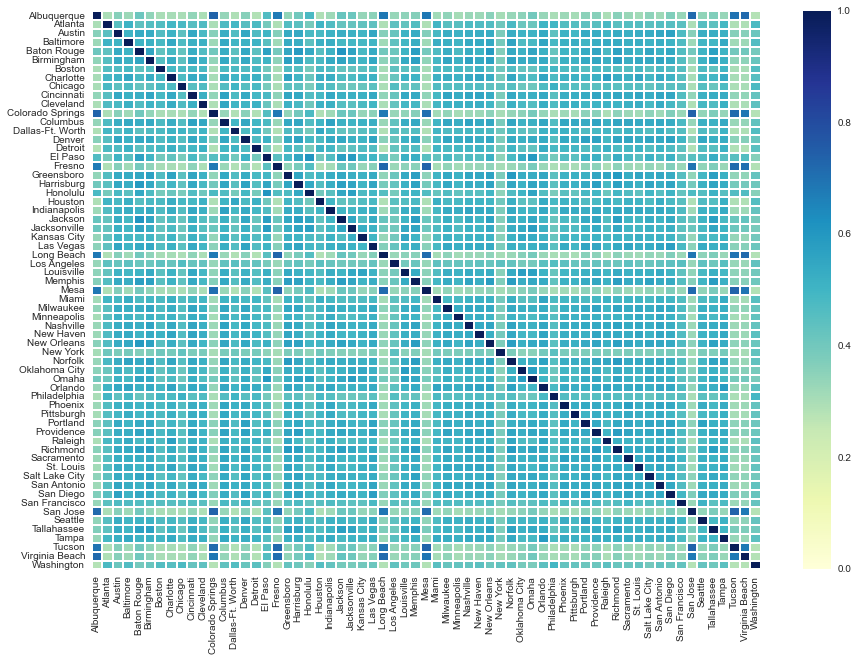

In [27]:
%matplotlib inline
dims = (15, 10)
fig, ax = plt.subplots(figsize=dims)
ax = sns.heatmap(jaccard_df, vmin=0, vmax=1, linewidths=.5, cmap="YlGnBu")
#ax.plot()

# Explanation:

From the visualisation, darker the dot, higher is the similarity of top trends between the places. The Jaccard similarity is taken to show how the places connect in terms of trends.The Jaccard Similarity is given by the formula jaccard(A,B)=|A⋂B|/|A⋃B|. We have implemented this with the trends of all the locations by taking pairs of locations and getting a ratio out of it with the merge and join of dataframes. We have found out some resemblance between the different location which are suddenly dark in a row or column of light similarity of the trends. The box plot shown was just intended to get an insight about the dataset, about the number of trends collected 'Worldwide' and its statistics.

# Conclusion:

From the visualisation, we believe, we were able to find out the similarity of the top trends of various locations of United States with the help of Jaccard Similarity and thus, we can show they are connected. We intended to find the similarity between the trends to know how they are connected with each other but, even without the map with connections shown, we could understand that with the heat map obtained. Hence, we believe that we have met our objective of finding the "Connectivity".